# Building Language Models in NLP: Creating an auto-Complete model

--Types of Language Models--
There are two types of language models in NLP:

Statistical Models:
Statistical models develop probabilistic models that help with predictions for the next word in the sequence. It also uses data to make predictions depending on the words that preceded. Moreover, there are multiple statistical language models that help businesses. For instance, N-Gram, Unigram, Bidirectional, exponential, etc are all examples of statistical models.

Neural Language Models:
Neural Language Models refer to language models that are developed using neural networks. Moreover, the models help mitigate the challenges that occur in classical language models. Further, it helps execute complex tasks like speech recognition or machine transition.

A language model in NLP is a probabilistic statistical model that determines the probability of a given sequence of words occurring in a sentence based on the previous words. It helps to predict which word is more likely to appear next in the sentence. Hence it is widely used in predictive text input systems, speech recognition, machine translation, spelling correction etc. The input to a language model is usually a training set of example sentences. The output is a probability distribution over sequences of words. We can use the last one word (unigram), last two words (bigram), last three words (trigram) or last n words (n-gram) to predict the next word as per our requirements.

Auto-complete system is something you may see every day.
- When you google something, you often have suggestions to help you complete your search. 
- When you are writing an email, you get suggestions telling you possible endings to your sentence.  


**Sources**
https://www.analyticsvidhya.com/blog/2022/01/building-language-models-in-nlp/

n-gram modeling using markov chain
https://sookocheff.com/post/nlp/ngram-modeling-with-markov-chains/

In [1]:
import nltk
# nltk.download() 
from nltk.tokenize import word_tokenize,sent_tokenize

In [2]:
import string
string.punctuation = string.punctuation +'“'+'”'+'-'+'’'+'‘'+'—'
string.punctuation = string.punctuation.replace('.', '')

In [3]:
with open("D:/Jan July 2023/NLP/Code/3.Autocomplete/en_US.twitter.txt",encoding="utf8") as f:
    data = f.read()
    
print("Data type:", type(data))
print("Number of letters:", len(data))
print("First 300 letters of the data")
print("-------")
display(data[0:300])
print("-------")


print("Last 300 letters of the data")
print("-------")
display(data[-300:])
print("-------")


Data type: <class 'str'>
Number of letters: 3335477
First 300 letters of the data
-------


"How are you? Btw thanks for the RT. You gonna be in DC anytime soon? Love to see you. Been way, way too long.\nWhen you meet someone special... you'll know. Your heart will beat more rapidly and you'll smile for no reason.\nthey've decided its more fun if I don't.\nSo Tired D; Played Lazer Tag & Ran A "

-------
Last 300 letters of the data
-------


"ust had one a few weeks back....hopefully we will be back soon! wish you the best yo\nColombia is with an 'o'...“: We now ship to 4 countries in South America (fist pump). Please welcome Columbia to the Stunner Family”\n#GutsiestMovesYouCanMake Giving a cat a bath.\nCoffee after 5 was a TERRIBLE idea.\n"

-------


In [4]:
#preprocess data to remove newlines and special characters
file_new = ""
for line in data:
    line_new = line.replace("\n", " ")      
    file_new += line_new
preprocessedCorpus = "".join([char for char in file_new if char not in string.punctuation])

In [5]:
preprocessedCorpus

'How are you Btw thanks for the RT. You gonna be in DC anytime soon Love to see you. Been way way too long. When you meet someone special... youll know. Your heart will beat more rapidly and youll smile for no reason. theyve decided its more fun if I dont. So Tired D Played Lazer Tag  Ran A LOT D Ughh Going To Sleep Like In 5 Minutes  Words from a complete stranger Made my birthday even better  First Cubs game ever Wrigley field is gorgeous. This is perfect. Go Cubs Go i no i get another day off from skool due to the wonderful snow  and THIS wakes me up...damn thing Im coo... Jus at work hella tired r u ever in cali The new sundrop commercial ...hehe love at first sight we need to reconnect THIS WEEK I always wonder how the guys on the auctions shows learned to talk so fast all I hear is djsosnekspqnslanskam. Dammnnnnn what a catch such a great picture The green shirt totally brings out your eyes Desk put together room all set up. Oh boy oh boy Im doing it👦 Beauty Brainstorming in the 

In [8]:
sentences = sent_tokenize(preprocessedCorpus)
print("1st 5 sentences of preprocessed corpus are : ")
print(sentences[0:5])
words = word_tokenize(preprocessedCorpus)
print("1st 5 words/tokens of preprocessed corpus are : ")
print(words[0:5])

1st 5 sentences of preprocessed corpus are : 
['How are you Btw thanks for the RT.', 'You gonna be in DC anytime soon Love to see you.', 'Been way way too long.', 'When you meet someone special... youll know.', 'Your heart will beat more rapidly and youll smile for no reason.']
1st 5 words/tokens of preprocessed corpus are : 
['How', 'are', 'you', 'Btw', 'thanks']


In [ ]:
# print(words[:200])

In [13]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [w for w in words if not w.lower() in stop_words]

In [10]:
print(filtered_tokens[:200])

['Btw', 'thanks', 'RT', '.', 'gon', 'na', 'DC', 'anytime', 'soon', 'Love', 'see', '.', 'way', 'way', 'long', '.', 'meet', 'someone', 'special', '...', 'youll', 'know', '.', 'heart', 'beat', 'rapidly', 'youll', 'smile', 'reason', '.', 'theyve', 'decided', 'fun', 'dont', '.', 'Tired', 'Played', 'Lazer', 'Tag', 'Ran', 'LOT', 'Ughh', 'Going', 'Sleep', 'Like', '5', 'Minutes', 'Words', 'complete', 'stranger', 'Made', 'birthday', 'even', 'better', 'First', 'Cubs', 'game', 'ever', 'Wrigley', 'field', 'gorgeous', '.', 'perfect', '.', 'Go', 'Cubs', 'Go', 'get', 'another', 'day', 'skool', 'due', 'wonderful', 'snow', 'wakes', '...', 'damn', 'thing', 'Im', 'coo', '...', 'Jus', 'work', 'hella', 'tired', 'r', 'u', 'ever', 'cali', 'new', 'sundrop', 'commercial', '...', 'hehe', 'love', 'first', 'sight', 'need', 'reconnect', 'WEEK', 'always', 'wonder', 'guys', 'auctions', 'shows', 'learned', 'talk', 'fast', 'hear', 'djsosnekspqnslanskam', '.', 'Dammnnnnn', 'catch', 'great', 'picture', 'green', 'shirt', 

### Creating Unigram, Bigram and Trigram Language Models
We can create n-grams using the ngrams module from nltk.util. N-grams are a sequence of n consecutive words occurring in the corpus. For example, the sentence “I love dogs” – ‘I’, ‘love’ and ‘dogs’ are unigrams while ‘I love’ and ‘love dogs’ are bigrams. ‘I love dogs’ is itself a trigram i.e. a contiguous sequence of three words. We obtain unigrams, bigrams and trigrams from the corpus using the following code :

In [11]:
from collections import Counter
from nltk.util import ngrams

unigrams=[]
bigrams=[]
trigrams=[]

for content in (sentences):
    content = content.lower()
    content = word_tokenize(content)
    for word in content:
        if (word =='.'):
            content.remove(word) 
        else:
            unigrams.append(word)
            
    bigrams.extend(ngrams(content,2))
    trigrams.extend(ngrams(content,3))

In [12]:
print ("Sample of n-grams:n" + "-------------------------")
print ("UNIGRAMS: \n" + str(unigrams[:5]) + " ...n")
print ("BIGRAMS: \n" + str(bigrams[:5]) + " ...n")
print ("TRIGRAMS: \n" + str(trigrams[:5]) + " ...n")

Sample of n-grams:n-------------------------
UNIGRAMS: 
['how', 'are', 'you', 'btw', 'thanks'] ...n
BIGRAMS: 
[('how', 'are'), ('are', 'you'), ('you', 'btw'), ('btw', 'thanks'), ('thanks', 'for')] ...n
TRIGRAMS: 
[('how', 'are', 'you'), ('are', 'you', 'btw'), ('you', 'btw', 'thanks'), ('btw', 'thanks', 'for'), ('thanks', 'for', 'the')] ...n


In [14]:
# Next, we obtain those unigrams, bigrams and trigrams from the corpus which do not have stopwords like 
# articles, prepositions or determiners in them. For example, we remove bigrams like ‘in the’ and we remove 
# unigrams like ‘the’, ‘a’ etc. We use the following code for the removal of stopwords from n-grams.

def stopwords_removal(n, a):     
    b = []
    
    if n == 1:
        for word in a:
            count = 0
            if word in stop_words:
                count = 0
            else:
                count = 1
                
            if (count==1):
                b.append(word)
        return(b)
    
    else:
        for pair in a:
            count = 0
            for word in pair:
                if word in stop_words:
                    count = count or 0
                else:
                    count = count or 1
                    
            if (count==1):
                b.append(pair)
        return(b)


In [15]:
unigrams_Processed = stopwords_removal(1,unigrams)
bigrams_Processed = stopwords_removal(2,bigrams)
trigrams_Processed = stopwords_removal(3,trigrams)
print ("Sample of n-grams after processing:n" + "-------------------------")
print ("UNIGRAMS: \n" + str(unigrams_Processed[:5]) + " ...n")
print ("BIGRAMS: \n" + str(bigrams_Processed[:5]) + " ...n")
print ("TRIGRAMS: \n" + str(trigrams_Processed[:5]) + " ...n")

Sample of n-grams after processing:n-------------------------
UNIGRAMS: 
['btw', 'thanks', 'rt', 'gon', 'na'] ...n
BIGRAMS: 
[('you', 'btw'), ('btw', 'thanks'), ('thanks', 'for'), ('the', 'rt'), ('you', 'gon')] ...n
TRIGRAMS: 
[('are', 'you', 'btw'), ('you', 'btw', 'thanks'), ('btw', 'thanks', 'for'), ('thanks', 'for', 'the'), ('for', 'the', 'rt')] ...n


In [16]:
def get_ngrams_freqDist(n, ngramList):
    ngram_freq_dict = {}
    for ngram in ngramList:
        if ngram in ngram_freq_dict:
            ngram_freq_dict[ngram] += 1
        else:
            ngram_freq_dict[ngram] = 1
    return ngram_freq_dict

In [17]:
# unigrams_freqDist = get_ngrams_freqDist(1, unigrams)
unigrams_Processed_freqDist = get_ngrams_freqDist(1, unigrams_Processed)
print(unigrams_Processed_freqDist)

{'btw': 71, 'thanks': 1870, 'rt': 1772, 'gon': 438, 'na': 755, 'dc': 79, 'anytime': 43, 'soon': 396, 'love': 2132, 'see': 1336, 'way': 715, 'long': 374, 'meet': 211, 'someone': 424, 'special': 160, '...': 4061, 'youll': 155, 'know': 1607, 'heart': 200, 'beat': 114, 'rapidly': 4, 'smile': 92, 'reason': 112, 'theyve': 17, 'decided': 48, 'fun': 434, 'dont': 1824, 'tired': 155, 'played': 82, 'lazer': 1, 'tag': 18, 'ran': 43, 'lot': 262, 'ughh': 1, 'going': 1128, 'sleep': 248, 'like': 2550, '5': 254, 'minutes': 133, 'words': 163, 'complete': 62, 'stranger': 19, 'made': 359, 'birthday': 348, 'even': 505, 'better': 589, 'first': 640, 'cubs': 21, 'game': 598, 'ever': 513, 'wrigley': 7, 'field': 59, 'gorgeous': 53, 'perfect': 177, 'go': 1515, 'get': 2257, 'another': 368, 'day': 1818, 'skool': 8, 'due': 71, 'wonderful': 106, 'snow': 56, 'wakes': 5, 'damn': 259, 'thing': 438, 'im': 3252, 'coo': 7, 'jus': 42, 'work': 861, 'hella': 25, 'r': 180, 'u': 1553, 'cali': 21, 'new': 1380, 'sundrop': 1, 'co

In [18]:
bigrams[:5]

[('how', 'are'),
 ('are', 'you'),
 ('you', 'btw'),
 ('btw', 'thanks'),
 ('thanks', 'for')]

In [19]:
bigrams_Processed[:5]

[('you', 'btw'),
 ('btw', 'thanks'),
 ('thanks', 'for'),
 ('the', 'rt'),
 ('you', 'gon')]

In [20]:
unigrams_freqDist = get_ngrams_freqDist(1, unigrams)
unigrams_Processed_freqDist = get_ngrams_freqDist(1, unigrams_Processed)

bigrams_freqDist = get_ngrams_freqDist(2, bigrams)
bigrams_Processed_freqDist = get_ngrams_freqDist(2, bigrams_Processed)

trigrams_freqDist = get_ngrams_freqDist(3, trigrams)
trigrams_Processed_freqDist = get_ngrams_freqDist(3, trigrams_Processed)

In [21]:
for i, item in enumerate(unigrams_Processed_freqDist.items()):
    if i>5:
        break
    print(item)

('btw', 71)
('thanks', 1870)
('rt', 1772)
('gon', 438)
('na', 755)
('dc', 79)


In [22]:
for i, item in enumerate(unigrams_freqDist.items()):
    if i>5:
        break
    print(item)

('how', 1491)
('are', 3283)
('you', 11186)
('btw', 71)
('thanks', 1870)
('for', 7802)


In [23]:
for i, (key, value) in enumerate(bigrams_Processed_freqDist.items()):
    if i>5:
        break
    print(key, value)

('you', 'btw') 2
('btw', 'thanks') 2
('thanks', 'for') 863
('the', 'rt') 73
('you', 'gon') 20
('gon', 'na') 421


In [ ]:
for i, (key, value) in enumerate(bigrams_freqDist.items()):
    if i>5:
        break
    print(key, value)

## Predicting Next words using Bigram and Trigram Models

For example, the probability of the sentence “I love dogs” is given by :

P(I love dogs) = P(I)P(love | I)P(dogs | I love)

Now the individual probabilities can be obtained in the following way :

P(I) = Count(‘I’) / Total no. of words

P(love | I) = Count(‘I love’) / Count(‘I’)

P(dogs | I love) = Count(‘I love dogs’) / Count(‘I love’)

Note that Count(‘I’), Count(‘I love’) and Count(‘I love dogs’) are the frequencies of the respective unigram, bigram and trigram which we computed earlier using the get_ngrams_freqDist function.

Now, when we use a bigram model to compute the probabilities, the probability of each new word depends only on its previous word. That is, for the previous example, the probability of the sentence becomes :

P(I love dogs) = P(I)P(love | I)P(dogs | love)

Similarly, for a trigram model, the probability will be given by :

P(I love dogs) = P(I)P(love | I)P(dogs | I love) since the probability of each new word depends on the previous two words.

## Smoothing
Suppose there is some bigram that does not appear in the training set but appears in the test set. Then we will assign a probability of 0 to that bigram, making the overall probability of the test sentence 0, which is undesirable. Smoothing is done to overcome this problem. Parameters are smoothed (or regularized) to reassign some probability mass to unseen events. One way of smoothing is Add-one or Laplace smoothing,

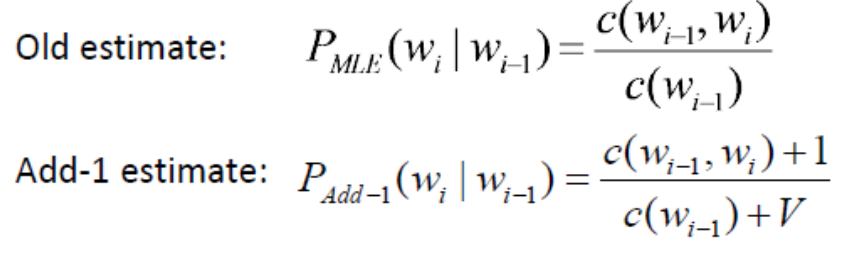

In [24]:
for i, (key, value) in enumerate(bigrams_freqDist.items()):
    if i>5:
        break
    print(key, value)

('how', 'are') 83
('are', 'you') 490
('you', 'btw') 2
('btw', 'thanks') 2
('thanks', 'for') 863
('for', 'the') 1469


In [25]:
for i, (key, value) in enumerate(trigrams_freqDist.items()):
    if i>5:
        break
    print(key, value)

('how', 'are', 'you') 67
('are', 'you', 'btw') 1
('you', 'btw', 'thanks') 1
('btw', 'thanks', 'for') 2
('thanks', 'for', 'the') 469
('for', 'the', 'rt') 71


In [ ]:
type(bigrams_freqDist)

In [27]:
bigrams_freqDist[('how', 'are')] 

83

In [28]:
unigrams_freqDist['how']

1491

In [26]:
(bigrams_freqDist[('how', 'are')]) / (unigrams_freqDist['how'])

0.055667337357478204

In [30]:
(bigrams_freqDist[('how', 'are')]+1) / (unigrams_freqDist['how']+150000)

0.0005544883854486405

In [34]:
# We will be using the unprocessed bigrams and trigrams (without articles, determiners removed) for prediction.

smoothed_bigrams_probDist = {}
V = len(unigrams_freqDist)

for i in bigrams_freqDist:
    smoothed_bigrams_probDist[i] = (bigrams_freqDist[i] + 1)/(unigrams_freqDist[i[0]]+V)
    
smoothed_trigrams_probDist = {}
for i in trigrams_freqDist:
    smoothed_trigrams_probDist[i] = (trigrams_freqDist[i] + 1)/(bigrams_freqDist[i[0:2]]+V)

In [35]:
for i, (key, value) in enumerate(smoothed_bigrams_probDist.items()):
    if i>5:
        break
    print(key, value)

('how', 'are') 0.001960601251050322
('are', 'you') 0.011000089613764674
('you', 'btw') 5.710043967338549e-05
('btw', 'thanks') 7.242178447276941e-05
('thanks', 'for') 0.019989357517988107
('for', 'the') 0.029905401281660055


In [ ]:
# smoothed_trigrams_probDist.items()

In [36]:
for i, (key, value) in enumerate(smoothed_trigrams_probDist.items()):
    if i>5:
        break
    print(key, value)

('how', 'are', 'you') 0.0016410850468191911
('are', 'you', 'btw') 4.779772004875368e-05
('you', 'btw', 'thanks') 4.836174585902551e-05
('btw', 'thanks', 'for') 7.254261878853827e-05
('thanks', 'for', 'the') 0.011133219632366876
('for', 'the', 'rt') 0.0016813787305590584


In [37]:
# Next, we try to predict the next three words of three test sentences using the computed smoothed bigram and trigram language 
# models.
testSent1 = "There was a sudden jerk, a terrific convulsion of the limbs; and there he"
testSent2 = "They made room for the stranger, but he sat down"
testSent3 = "The hungry and destitute situation of the infant orphan was duly reported by"

In [38]:
# First, we tokenize the test sentences into component words and obtain the last unigrams and bigrams appearing in them.

token_1 = word_tokenize(testSent1)
token_2 = word_tokenize(testSent2)
token_3 = word_tokenize(testSent3)

print(token_1)

ngram_1 = {1:[], 2:[]}    
ngram_2 = {1:[], 2:[]}
ngram_3 = {1:[], 2:[]}

for i in range(2):
    ngram_1[i+1] = list(ngrams(token_1, i+1))[-1]
    ngram_2[i+1] = list(ngrams(token_2, i+1))[-1]
    ngram_3[i+1] = list(ngrams(token_3, i+1))[-1]
    
    
print("\nSentence 1: ", ngram_1,"\nSentence 2: ",ngram_2,"\nSentence 3: ",ngram_3)

['There', 'was', 'a', 'sudden', 'jerk', ',', 'a', 'terrific', 'convulsion', 'of', 'the', 'limbs', ';', 'and', 'there', 'he']

Sentence 1:  {1: ('he',), 2: ('there', 'he')} 
Sentence 2:  {1: ('down',), 2: ('sat', 'down')} 
Sentence 3:  {1: ('by',), 2: ('reported', 'by')}


In [39]:
for i, (key, value) in enumerate(smoothed_bigrams_probDist.items()):
    if i>5:
        break
    print(key, value)

('how', 'are') 0.001960601251050322
('are', 'you') 0.011000089613764674
('you', 'btw') 5.710043967338549e-05
('btw', 'thanks') 7.242178447276941e-05
('thanks', 'for') 0.019989357517988107
('for', 'the') 0.029905401281660055


In [ ]:
ngram_1[1][0]

In [49]:
# Next, we write functions to predict the next word of the three test sentences using the smoothed bigram model.
def predict_next_word(last_word,probDist):
    next_word = {}
    for k in probDist:
        if k[0] == last_word[0]:
            next_word[k[1]] = probDist[k]
    print(next_word)
    
    k = Counter(next_word)
#     print(k)
    high = k.most_common(1) 
    return high[0]

In [2]:
predict_next_word(('how',), smoothed_bigrams_probDist)

In [46]:
def predict_next_3_words(token,probDist):
    pred1 = []
    pred2 = []
    next_word = {}
    for i in probDist:
        if i[0] == token:
            next_word[i[1]] = probDist[i]
    k = Counter(next_word)
    high = k.most_common(2) 
    
    w1a = high[0]
    w1b = high[1]
    
    w2a = predict_next_word(w1a,probDist)
    w3a = predict_next_word(w2a,probDist)
    w2b = predict_next_word(w1b,probDist)
    w3b = predict_next_word(w2b,probDist)
    
    pred1.append(w1a)
    pred1.append(w2a)
    pred1.append(w3a)
    pred2.append(w1b)
    pred2.append(w2b)
    pred2.append(w3b)
    return pred1,pred2


In [47]:
print("Predicting next 3 possible word sequences with smoothed bigram model : ")
pred1,pred2 = predict_next_3_words(ngram_1[1][0],smoothed_bigrams_probDist)
print("1a)" +testSent1 +" " + pred1[0][0]+" "+pred1[1][0]+" "+pred1[2][0])
print("1b)" +testSent1 +" " + pred2[0][0]+" "+pred2[1][0]+" "+pred2[2][0])

pred1,pred2 = predict_next_3_words(ngram_2[1][0],smoothed_bigrams_probDist)
print("2a)" +testSent2 +" "+ pred1[0][0]+" "+pred1[1][0]+" "+pred1[2][0])
print("2b)" +testSent2 +" "+ pred2[0][0]+" "+pred2[1][0]+" "+pred2[2][0])

pred1,pred2 = predict_next_3_words(ngram_3[1][0],smoothed_bigrams_probDist)
print("3a)" +testSent3 +" " + pred1[0][0]+" "+pred1[1][0]+" "+pred1[2][0])
print("3b)" +testSent3 +" " + pred2[0][0]+" "+pred2[1][0]+" "+pred2[2][0])

Predicting next 3 possible word sequences with smoothed bigram model : 
1a)There was a sudden jerk, a terrific convulsion of the limbs; and there he was a great
1b)There was a sudden jerk, a terrific convulsion of the limbs; and there he is the best
2a)They made room for the stranger, but he sat down the best friend
2b)They made room for the stranger, but he sat down to be a
3a)The hungry and destitute situation of the infant orphan was duly reported by the best friend
3b)The hungry and destitute situation of the infant orphan was duly reported by a great day
